In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten 

In [4]:

train_ds = keras.utils.image_dataset_from_directory(
    directory = 'traindata',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'testdata',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 12339 files belonging to 2 classes.
Found 3085 files belonging to 2 classes.


In [5]:
# Normilize the image
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label 

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)



In [7]:
# Create CNN model for classification

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()


2024-11-07 11:17:18.927039: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.
2024-11-07 11:17:19.003429: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 58982400 exceeds 10% of free system memory.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [10]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [12]:
history = model.fit(train_ds, epochs=5, validation_data = validation_ds)


Epoch 1/5
386/386 [==============================] - 1513s 4s/step - loss: 0.1759 - accuracy: 0.9263 - val_loss: 0.0694 - val_accuracy: 0.9757
Epoch 2/5
386/386 [==============================] - 1530s 4s/step - loss: 0.0398 - accuracy: 0.9850 - val_loss: 0.0508 - val_accuracy: 0.9815
Epoch 3/5
386/386 [==============================] - 1560s 4s/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0558 - val_accuracy: 0.9818
Epoch 4/5
386/386 [==============================] - 1563s 4s/step - loss: 0.0191 - accuracy: 0.9933 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 5/5
386/386 [==============================] - 1441s 4s/step - loss: 0.0128 - accuracy: 0.9953 - val_loss: 0.0531 - val_accuracy: 0.9848


In [13]:
model.save('drctorai.h5')

/home/rohan/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


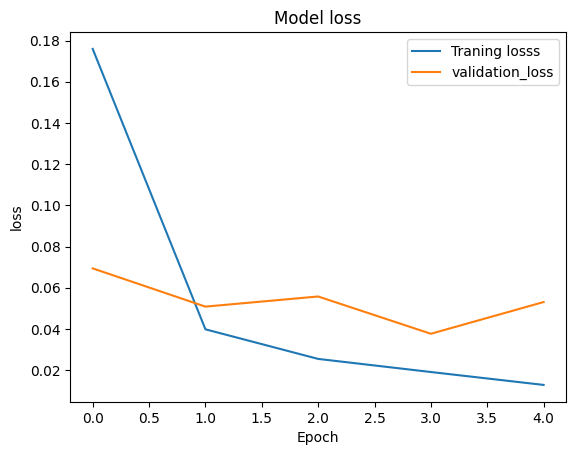

In [14]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label = 'Traning losss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

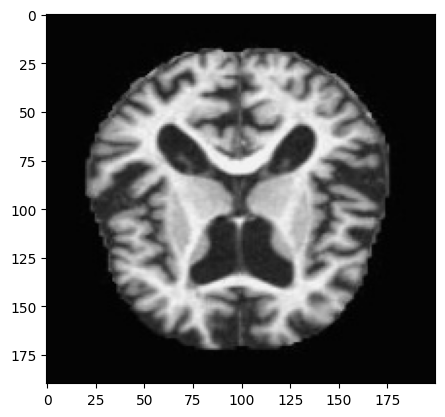

In [15]:
import cv2 

testimg = cv2.imread('testimg.jpg')
plt.imshow(testimg)


In [16]:
testimg = cv2.resize(testimg,(256,256))
testinput = testimg.reshape((1,256,256,3))
model.predict(testinput)

1/1 [==============================] - 1s 883ms/step


array([[1.]], dtype=float32)

In [26]:
# 1.Normal
# 0.AD

testimg = cv2.imread('testdata/AD/0ce036a7-c924-4799-ab23-71ae7a550cf0.jpg')
# plt.imshow(testimg)
testimg = cv2.resize(testimg,(256,256))
testinput = testimg.reshape((1,256,256,3))
model.predict(testinput)

1/1 [==============================] - 0s 60ms/step


array([[0.]], dtype=float32)

In [24]:

testimg = cv2.imread('testdata/CN/ff03822c-7ae5-49b6-853d-2b373cc76895.jpg')
# plt.imshow(testimg)
testimg = cv2.resize(testimg,(256,256))
testinput = testimg.reshape((1,256,256,3))
model.predict(testinput)

1/1 [==============================] - 0s 85ms/step


array([[1.]], dtype=float32)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your ImageDataGenerator with rescaling if needed
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Use flow_from_directory if your test images are organized in subfolders by class
test_generator = test_datagen.flow_from_directory(
    'testdata',  # path to test data directory
    target_size=(256, 256),  # resize images if necessary
    batch_size=32,  # choose an appropriate batch size
    class_mode='binary'  # or 'categorical' for multi-class classification
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Print the test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 3085 images belonging to 2 classes.
96/96 [==============================] - 69s 710ms/step - loss: 0.0748 - accuracy: 0.9798
Test Loss: 0.0748
Test Accuracy: 0.9798


97/97 [==============================] - 72s 738ms/step


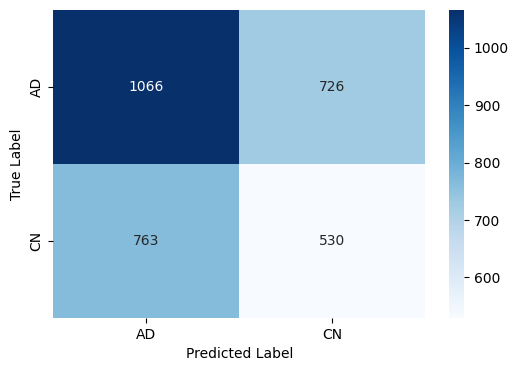

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = (y_pred > 0.5).astype("int32")  # For binary classification

# Get true labels
y_true = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.58      0.59      0.59      1792
           1       0.42      0.41      0.42      1293

    accuracy                           0.52      3085
   macro avg       0.50      0.50      0.50      3085
weighted avg       0.52      0.52      0.52      3085

